In [1]:
import h5py
import pandas as pd
import numpy as np

DATA_DIR = "../../data/logs"

In [2]:
with h5py.File(DATA_DIR + '/preprocessed.h5','r') as hf:
    nextImages = hf['nextImage'][...]
    currentImages = hf['currentImage'][...]
    metadata = hf['metadata'][...]
    ids = hf['ids'][...]

In [3]:
df = pd.DataFrame([{ 
    "currentImage": ci,
    "nextImage": ni,
    "action": int(md[0]),
    "reward": md[1],
    "died": int(md[2]),
    "didBoost": int(md[3]),
    "id": i.decode()} for ni, ci, md, i in zip(nextImages, currentImages, metadata, ids)])

In [4]:
df = df.loc[(df['id'] != "00000000-0000-0000-0000-000000000000") & (df['reward'] < 25.0) & (df['reward'] > -25.0)]

In [5]:
def min_max(x):
    _min = np.min(x)
    _max = np.max(x)

    return (x - _min) / (_max - _min) * 2.0 - 1.0
df['reward'] = min_max(df['reward'])

In [6]:
import os
os.chdir('..')

In [7]:
from src.game import Trainer



In [8]:
mdl = Trainer.train_override(df.to_dict("records"))

  0%|          | 0/2048 [00:00<?, ?it/s]Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         2098176     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         1049600     dense[0][0]                      
__________________________________________________________________________________________________
move (Dense)                    (None, 9)            9225        dense_1[0][0]                    
______________________________________________________

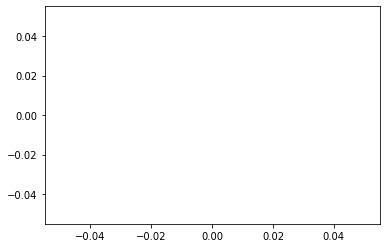

In [9]:
import matplotlib.pyplot as plt

loss = mdl.history["loss"]
macc = mdl.history["move_accuracy"]
bacc = mdl.history["boost_accuracy"]
plt.plot(bacc)

In [11]:
macc

[0.5302734375,
 0.04541015625,
 0.03857421875,
 0.04541015625,
 0.1044921875,
 0.1044921875,
 0.10546875,
 0.1044921875,
 0.1044921875,
 0.10498046875]